# JSON exercise
***

- use packages that deal with JSON
- find the top 10 countries with the most projects
- find the top 10 major project themes 
- create a dataframe with the missing values filled in
***

- datasource: http://jsonstudio.com/resources/
***

In [455]:
# import necesary packages
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

In [456]:
# load file as pandas dataframe
df = pd.read_json('data/world_bank_projects.json')

In [457]:
# find the top 10 countries with the most projects
countries = df.countryname.value_counts()
countries = countries.head(10)
countries

Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64

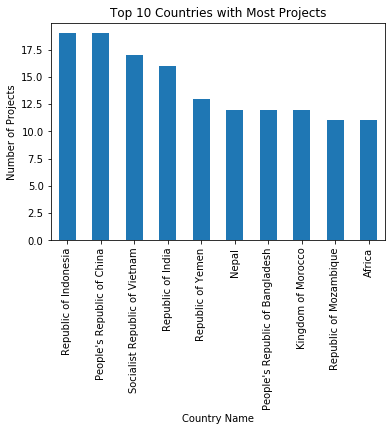

In [458]:
# visualize the results
country_plot = countries.plot(kind='bar', 
                    title='Top 10 Countries with Most Projects')
country_plot.set_xlabel('Country Name')
country_plot.set_ylabel('Number of Projects')
plt.show()

***

In [459]:
# import nested json data as a string
stringdata = json.load((open('data/world_bank_projects.json')))

# normalize the string to create tables from the nested element
themes = json_normalize(stringdata, 'mjtheme_namecode')

# exclude blank themes
themes_drop = themes[themes['name'] != '']

# find the top 10 major themes
themes_drop_10 = themes_drop.name.value_counts().head(10)
themes_drop_10

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Economic management                              33
Name: name, dtype: int64

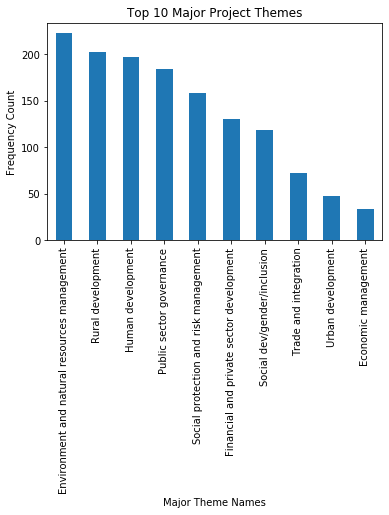

In [460]:
# create a bar plot to visualize top ten major project themes
theme_plot = themes_drop_10.plot(kind='bar', title='Top 10 Major Project Themes')
theme_plot.set_xlabel('Major Theme Names')
theme_plot.set_ylabel('Frequency Count')
plt.show()

***

In [465]:
# create a dictionary with codes as keys and corresponding 
# names as values
keys = themes_drop.drop_duplicates()
key_dict = keys.set_index('code').to_dict()['name']

In [462]:
# use a for loop to replace missing values with key_dict values
for key, value in key_dict.items():
    themes.loc[themes.code == key, 'name'] = value

themes.code = pd.to_numeric(themes.code)
themes = themes.set_index('code').sort_index()
themes

,name
code,
1,Economic management
1,Economic management
1,Economic management
1,Economic management
1,Economic management
1,Economic management
1,Economic management
1,Economic management
1,Economic management


In [463]:
# convert missing values to Nans
themes_nan = themes.replace("", np.nan)
# forward fill the null values
themes_filled = pd.DataFrame(themes_nan.name.fillna(method='ffill'))
# change index to numeric in order to sort 
themes_filled.index = pd.to_numeric(themes_filled.index, errors='coerce')
themes_filled.sort_index()

,name
code,
1,Economic management
1,Economic management
1,Economic management
1,Economic management
1,Economic management
1,Economic management
1,Economic management
1,Economic management
1,Economic management


In [464]:
# back fill the null values 
themes_bfill = pd.DataFrame(themes_nan.name.fillna(method='ffill'))
themes_bfill.index = pd.to_numeric(themes_bfill.index)
themes_bfill = themes_bfill.sort_index()
themes_bfill

,name
code,
1,Economic management
1,Economic management
1,Economic management
1,Economic management
1,Economic management
1,Economic management
1,Economic management
1,Economic management
1,Economic management
